In [1]:
!pip install little_mallet_wrapper
!pip install wordcloud
!pip install gensim
!pip install pyldavis

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
from os import listdir
from os.path import isfile, join
import glob 
import os
import re
import matplotlib.pyplot as plt
import little_mallet_wrapper as lmw
from pathlib import Path
from collections import Counter 
from wordcloud import WordCloud
import nltk
import gensim
from gensim.utils import simple_preprocess
from gensim.corpora import Dictionary
from nltk.tokenize import word_tokenize
from tqdm.notebook import tqdm
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
import pyLDAvis.sklearn
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
from gensim.models import CoherenceModel
import seaborn as sns

In [3]:
# import preprocessed df
df = pd.read_csv('CR_dataset.csv')
df.head()

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Year       Company company_name  nb_of_reports_in_dataset Global 500  \
0  2019       NYSE_IT      Gartner                         3         no   
1  2020       NYSE_IT      Gartner                         3         no   
2  2021       NYSE_IT      Gartner                         3         no   
3  2021  NASDAQ_CMCSA      Comcast                         9        yes   
4  2020  NASDAQ_CMCSA      Comcast                         9        yes   

  Global 100 FAANG                                report_preprocessed  \
0         no    no  corporate responsibility report shaping succes...   
1         no    no  nbcuniversal impact report impact report nbcun...   
2         no    no  cybersecurity moving target corporate responsi...   
3        yes    no  mobilising development corporate responsibilit...   
4        yes    no  corporat sustainabilit repor ontents repor ceo...   

   unique_words  total_word_count  \
0          3892             18341   
1          3177             11049   
2          5424             22048   
3          5753             33463   
4          7026             73374   

                                    report_tokenized  \
0  ['corporate', 'responsibility', 'report', 'sha...   
1  ['nbcuniversal', 'impact', 'report', 'impact',...   
2  ['cybersecurity', 'moving', 'target', 'corpora...   
3  ['mobilising', 'development', 'corporate', 're...   
4  ['corporat', 'sustainabilit', 'repor', 'ontent...   

                                   report_lemmatized  \
0  corporate responsibility report shape successf...   
1  nbcuniversal impact report impact report nbcun...   
2  cybersecurity move target corporate responsibi...   
3  mobilise development corporate responsibility ...   
4  corporat sustainabilit repor ontents repor ceo...   

                                 report_lemmatized_2  \
0  ['corporate', 'responsibility', 'report', 'sha...   
1  ['nbcuniversal', 'impact', 'report', 'impact',...   
2  ['cybersecurity', 'move', 'target', 'corporate...   
3  ['mobilise', 'development', 'corporate', 'resp...   
4  ['corporat', 'sustainabilit', 'repor', 'ontent...   

                          report_lemmatized_filtered  
0  ['corporate', 'responsibility', 'report', 'sha...  
1  ['nbcuniversal', 'impact', 'report', 'impact',...  
2  ['cybersecurity', 'move', 'target', 'corporate...  
3  ['development', 'corporate', 'responsibility',...  
4  ['corporat', 'sustainabilit', 'repor', 'repor'...

In [4]:
df['report_lemmatized_filtered'] = df['report_lemmatized_filtered'].map(lambda x: " ".join(eval(x)))

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


-------------

# Method 1: lmw library

In [5]:
path_to_mallet = '/Users/juliettezaccour/Downloads/mallet-2.0.8/bin/mallet'

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
training_data = [lmw.process_string(t) for t in tqdm(df.report_lemmatized_filtered.tolist())]
training_data = [d for d in training_data if d.strip()]

len(training_data)

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


  0%|          | 0/1096 [00:00<?, ?it/s]

1092

In [7]:
lmw.print_dataset_stats(training_data)

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Number of Documents: 1092
Mean Number of Words per Document: 12876.4
Vocabulary Size: 23439


In [8]:
num_topics = 27
output_directory_path = '/Users/juliettezaccour/Documents/_GRAD-UofT/_4-FALL-2022/INF2209/Project/Output'

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
#topic_keys, topic_distributions = lmw.quick_train_topic_model(path_mallet, output_directory_path, 
#                                                              num_topics, training_data)

path_to_training_data           = output_directory_path + '/training.txt'
path_to_formatted_training_data = output_directory_path + '/mallet.training'
path_to_model                   = output_directory_path + '/mallet.model.' + str(num_topics)
path_to_topic_keys              = output_directory_path + '/mallet.topic_keys.' + str(num_topics)
path_to_topic_distributions     = output_directory_path + '/mallet.topic_distributions.' + str(num_topics)
path_to_word_weights            = output_directory_path + '/mallet.word_weights.' + str(num_topics)
path_to_diagnostics             = output_directory_path + '/mallet.diagnostics.' + str(num_topics) + '.xml'

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
lmw.import_data(path_to_mallet,
                path_to_training_data,
                path_to_formatted_training_data,
                training_data)

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Importing data...
Complete


In [11]:
lmw.train_topic_model(path_to_mallet,
                      path_to_formatted_training_data,
                      path_to_model,
                      path_to_topic_keys,
                      path_to_topic_distributions,
                      path_to_word_weights,
                      path_to_diagnostics,
                      num_topics)

Training topic model...


/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Complete


In [12]:
topic_keys = lmw.load_topic_keys(output_directory_path + '/mallet.topic_keys.' + str(num_topics))

for i, t in enumerate(topic_keys):
    print(i, '\t', ' '.join(t[:10]))

0 	 energy emission data use carbon renewable water environmental report power
1 	 group programme employee digital business work year support emission environmental
2 	 mobile service management network information development customer system high employee
3 	 site product performance year new company program end management process
4 	 product year supplier team report sustainability global use continue work
5 	 product supplier use report data impact chain supply emission include
6 	 report sustainability employee management year business total emission aspect client
7 	 employee company management business group work sustainability report customer safety
8 	 management corporate product social responsibility report supplier service risk supply
9 	 airport sea passenger linate total service source management area value
10 	 environmental product csr use fiscal group management recycle site substance
11 	 team member customer service report community program cent wireless include
12 	

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
topic_distributions = lmw.load_topic_distributions(output_directory_path + '/mallet.topic_distributions.' + str(num_topics))

len(topic_distributions), len(topic_distributions[0])

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(1092, 27)

In [14]:
assert(len(topic_distributions) == len(training_data))

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
for p, d in lmw.get_top_docs(training_data, topic_distributions, topic_index=0, n=3):
    print(round(p, 4), d)
    print()

0.9226 environmental report report approach performance highlight progress target environmental data glossary report environmental report provide update detailed information sustainability strategy share environmental report report cover fiscal year include data performance highlight progress target mention notable target set report outline drive positive environmental impact throughout business five key way design efficient data center advance carbon free energy create sustainable workplace build good device service empower user technology information overall corporate responsibility initiative see sustainability commitment websites well sustainability relate information information business see investor relation website environmental report approach believe every business opportunity obligation protect planet sustainability one core value strive build sustainability everything leader sustainability climate change since found year ago key achievement past two decade become first major

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [16]:
topic_word_probability_dict = lmw.load_topic_word_distributions(output_directory_path + '/mallet.word_weights.' + str(num_topics))

len(topic_word_probability_dict)

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


27

In [17]:
for _topic, _word_probability_dict in topic_word_probability_dict.items():
    print('Topic', _topic)
    for _word, _probability in sorted(_word_probability_dict.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(round(_probability, 4), '\t', _word)
    print()

Topic 0
0.0332 	 energy
0.0167 	 emission
0.0149 	 data
0.0148 	 use
0.0128 	 carbon
0.0123 	 renewable
0.0102 	 water
0.0096 	 environmental
0.0092 	 report
0.0092 	 power

Topic 1
0.0261 	 group
0.0103 	 programme
0.0102 	 employee
0.0101 	 digital
0.0097 	 business
0.0078 	 work
0.0075 	 year
0.0074 	 support
0.0067 	 emission
0.0064 	 environmental

Topic 2
0.0173 	 mobile
0.0143 	 service
0.011 	 management
0.0104 	 network
0.0087 	 information
0.0087 	 development
0.0079 	 customer
0.0077 	 system
0.0075 	 high
0.0069 	 employee

Topic 3
0.0129 	 site
0.0089 	 product
0.0083 	 performance
0.0082 	 year
0.0065 	 new
0.0063 	 company
0.0063 	 program
0.0061 	 end
0.0059 	 management
0.0058 	 process

Topic 4
0.024 	 product
0.0214 	 year
0.0136 	 supplier
0.0121 	 team
0.0114 	 report
0.011 	 sustainability
0.0103 	 global
0.0099 	 use
0.0092 	 continue
0.0084 	 work

Topic 5
0.0191 	 product
0.0138 	 supplier
0.0135 	 use
0.0112 	 report
0.0096 	 data
0.0095 	 impact
0.0093 	 chai

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [18]:
lmw.get_js_divergence_topics(0, 7, topic_word_probability_dict)
# need to understand what this is: I think it's the divergence between topics 0 and 7;
# checking how much 2 topics overlap

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.604280250144807

In [ ]:
lmw.get_js_divergence_topics(6, 7, topic_word_probability_dict)

In [19]:
companies_list = df['company_name'].unique().tolist()

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Applications/anaconda3/lib/python3.8/site-packages/little_mallet_wrapper/little_mallet_wrapper.py:230: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


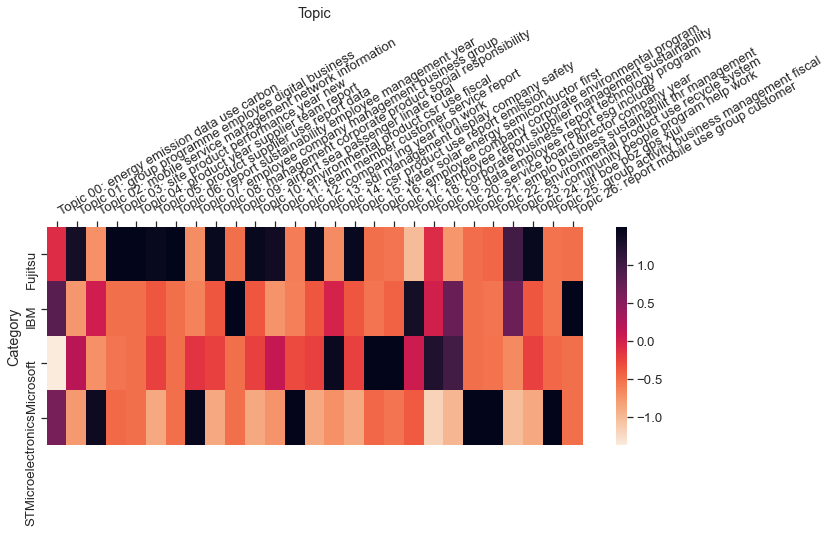

In [20]:
target_labels = ['STMicroelectronics', 'IBM', 'Fujitsu', 'Microsoft']

lmw.plot_categories_by_topics_heatmap(companies_list,
                                      topic_distributions,
                                      topic_keys, 
                                      output_directory_path + '/categories_by_topics.pdf',
                                      target_labels=target_labels,
                                      dim=(12,4))

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


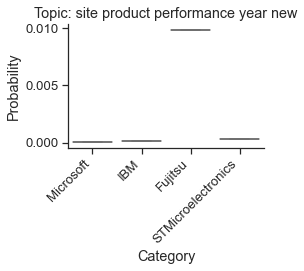

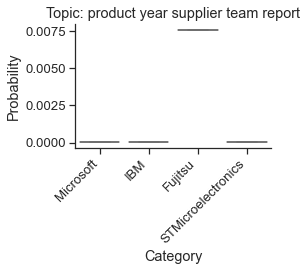

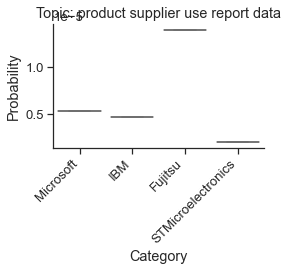

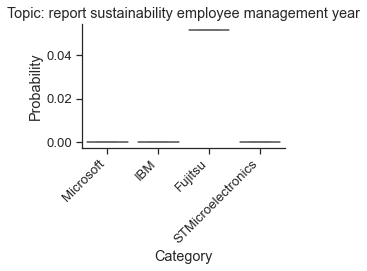

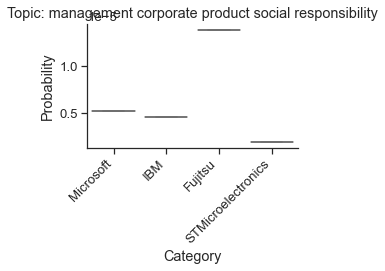

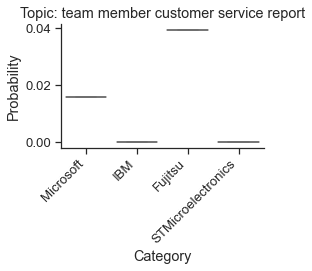

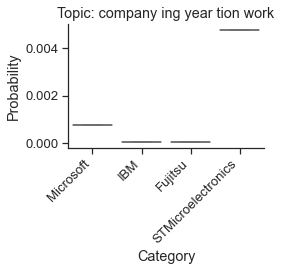

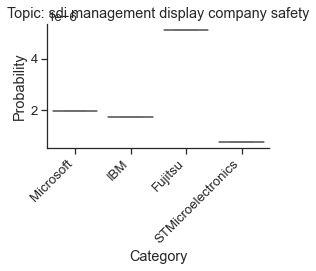

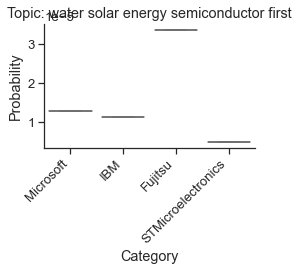

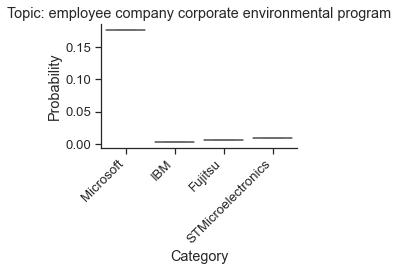

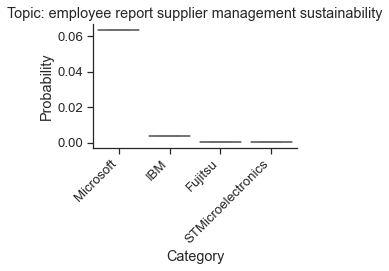

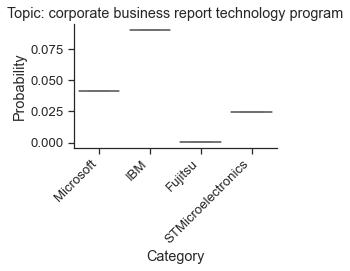

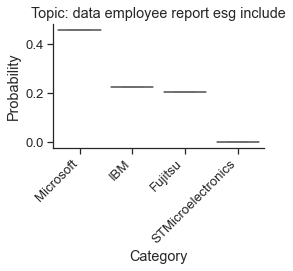

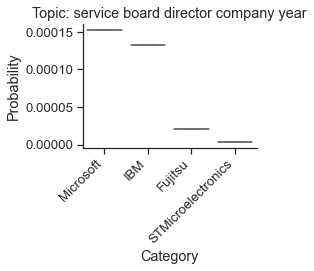

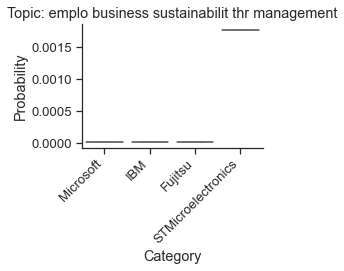

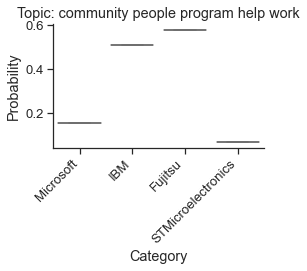

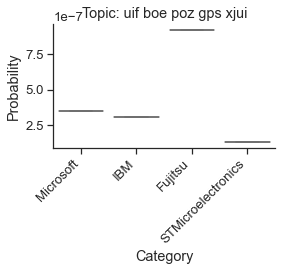

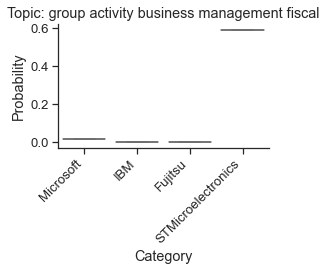

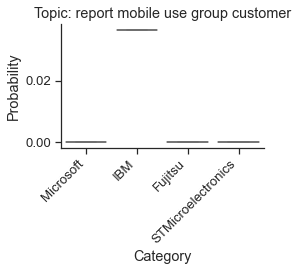

In [21]:
# compare the distribution of topics across different companies
# for each topic, what is its probability for each of the target companies?

for _topic_index in range(0, len(topic_keys)):
    
    lmw.plot_categories_by_topic_boxplots(companies_list,
                                          topic_distributions,
                                          topic_keys, 
                                          _topic_index,
                                          output_path=output_directory_path + '/boxplot.' + str(_topic_index) + '.pdf',
                                          target_labels=target_labels,
                                          dim=(4,4))

---------

# Method 2: LatentDirichletAllocation()
tutorial: https://towardsdatascience.com/nlp-part-3-exploratory-data-analysis-of-text-data-1caa8ab3f79d

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [23]:
# max_df=0.9 removes words that appear in more than 90% of the reports
# min_df=25 removes words that appear in less than 25 reports

tf_vectorizer = CountVectorizer(max_df=0.95, min_df=30, max_features=7500)
tf = tf_vectorizer.fit_transform(df['report_lemmatized_filtered'].values.astype('U'))
tf_feature_names = tf_vectorizer.get_feature_names()
doc_term_matrix = pd.DataFrame(tf.toarray(), columns=list(tf_feature_names))
doc_term_matrix

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


abatement  abbreviation  abc  abide  ability  able  abled  abnormal  \
0             0             0    0      2        8     8      0         0   
1             0             0    0      0        2     3      0         0   
2             0             0    0      1        5     2      1         0   
3             0             0    0      0        0     4      0         0   
4             0             0    0      0        0    10      2         0   
...         ...           ...  ...    ...      ...   ...    ...       ...   
1091          0             0    0      0        2     3      0         0   
1092          0             0    0      0        1     4      0         0   
1093          0             0    0      1        2     2      0         0   
1094          0             0    0      0        3     5      1         0   
1095          6             0    0      3        9    10      0         0   

      abolition  aboriginal  ...  youtube  yoy  yr  zation  zealand  zero  \
0             0           0  ...        0    0   0       0        0     1   
1             0           0  ...        0    0   0       0        0    11   
2             0           0  ...        1    0   0       6        0     2   
3             0           0  ...        0    0   0       0        8     0   
4             0           0  ...        0    4   8       0        0    14   
...         ...         ...  ...      ...  ...  ..     ...      ...   ...   
1091          0           0  ...        0    0   0       0        5     1   
1092          0           0  ...        0    0   0       0        8     1   
1093          0           0  ...        0    0   0       0        9     6   
1094          0           0  ...        0    1   0       0        0     1   
1095          1           0  ...        0    0   0       0        0     7   

      zhejiang  zhuhai  zinc  zone  
0            0       0     0     1  
1            0       0     0    14  
2            0       0     0     1  
3            0       0     0     1  
4            0       0     0     2  
...        ...     ...   ...   ...  
1091         0       0     0     0  
1092         0       0     0     0  
1093         0       0     0     3  
1094         0       0     0     0  
1095         0       0     0     1  

[1096 rows x 6337 columns]

In [26]:
lda_model = LatentDirichletAllocation(n_components=27, learning_method='online', max_iter=50, random_state=0).fit(tf)

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [27]:
no_top_words = 10

def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                          for i in topic.argsort()[:-no_top_words - 1:-1]]))
              
display_topics(lda_model, tf_feature_names, no_top_words)

Topic 0:
sustainability micron supplier jabil water wireless supply stem risk chain
Topic 1:
airport sea passenger source non financial million sustainability market sale
Topic 2:
risk safety display sustainability supplier issue supply sustainable ict chain
Topic 3:
director medium inc board production executive entertainment television diversity officer
Topic 4:
supplier emission recycle sustainability material site risk audit supply issue
Topic 5:
recycle supplier material facility packaging member computer equipment requirement life
Topic 6:
solar sustainability first water emission organization across project stakeholder campus
Topic 7:
sustainability inc emission promote society recycle establish substance human site
Topic 8:
site fiscal recycle chemical substance green water emission material end
Topic 9:
associate red und hat die der open robert source für
Topic 10:
gri client sustainability security topic america committee internal economic director
Topic 11:
emplo thr int ene

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [28]:
lda_model.perplexity(tf)

# Perplexity is an intrinsic evaluation method
# Intuitively, if a model assigns a high probability to the test set, it means that it is not surprised to see it 
# (it’s not perplexed by it), which means that it has a good understanding of how the language works.
# a lower perplexity indicates a better model

# We can interpret perplexity as the weighted branching factor. If we have a perplexity of 100, it means that whenever 
# the model is trying to guess the next word it is as confused as if it had to pick between 100 words.

# in other words: high perplexity is not a great sign

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1679.5813234946488

In [29]:
# Visualizing topics

pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(lda_model, tf, tf_vectorizer, mds='mmds') # mds='tsne'
panel

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
17    -0.018332  0.078678       1        1  9.938689
13    -0.056352  0.013706       2        1  9.199383
19    -0.004525 -0.148750       3        1  9.006718
7      0.095396 -0.004334       4        1  7.398701
12    -0.023433  0.049108       5        1  7.344997
26    -0.009576 -0.024087       6        1  6.339425
2      0.040832  0.007884       7        1  5.673542
23    -0.114603  0.032042       8        1  5.554092
24     0.016429 -0.077452       9        1  4.739314
20    -0.123167 -0.132447      10        1  4.284135
25     0.131333 -0.086076      11        1  4.229027
8      0.124250  0.097367      12        1  4.081613
18    -0.025353 -0.100380      13        1  3.998796
5      0.061584  0.146661      14        1  3.251803
6     -0.078598 -0.057915      15        1  3.092245
14    -0.164639 -0.040589      16        1  2.933600
1      0.095603 -0.156930      17        1  2.411202
11    -0.331953 -0.027580      18        1  1.334882
15    -0.240144  0.167061      19        1  1.288292
21    -0.108004  0.260836      20        1  1.183548
3      0.040063 -0.307704      21        1  0.984658
10    -0.261776 -0.306645      22        1  0.930314
0     -0.074029  0.160842      23        1  0.684464
9      0.156082  0.526475      24        1  0.115358
22     0.290953 -0.024070      25        1  0.000401
4      0.290960 -0.024069      26        1  0.000401
16     0.290997 -0.021634      27        1  0.000401, topic_info=                Term          Freq         Total Category  logprob  loglift
1352             csr  25944.000000  25944.000000  Default  30.0000  30.0000
2551             gri  26285.000000  26285.000000  Default  29.0000  29.0000
5565  sustainability  65412.000000  65412.000000  Default  28.0000  28.0000
385        associate   9660.000000   9660.000000  Default  27.0000  27.0000
5535        supplier  65991.000000  65991.000000  Default  26.0000  26.0000
...              ...           ...           ...      ...      ...      ...
73            across      0.006391  21243.476250  Topic27  -8.7525  -2.5911
3279            life      0.006391  18882.588604  Topic27  -8.7525  -2.4733
6186           water      0.006391  37288.041443  Topic27  -8.7525  -3.1538
463            award      0.006390  16961.544703  Topic27  -8.7526  -2.3661
5068        security      0.006390  22036.207846  Topic27  -8.7526  -2.6278

[1871 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
2         4  0.072839       abc
2         7  0.020811       abc
2         9  0.270546       abc
2        10  0.041622       abc
2        11  0.353791       abc
...     ...       ...       ...
6332     21  0.003568      zero
6332     23  0.002254      zero
6333      5  0.018110  zhejiang
6333      7  0.060367  zhejiang
6333     16  0.917574  zhejiang

[14580 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[18, 14, 20, 8, 13, 27, 3, 24, 25, 21, 26, 9, 19, 6, 7, 15, 2, 12, 16, 22, 4, 11, 1, 10, 23, 5, 17])

In [42]:
# adding the topics to the df
lda_topic_values = lda_model.transform(tf)
df['lda_topics'] = lda_topic_values.argmax(axis=1)

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [44]:
test = df['lda_topics'].value_counts()
test = pd.DataFrame(test).reset_index().rename(columns={'index':'Topic','lda_topics':'doc_freq'})
test['Topic'] = test['Topic']+1

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [49]:
test.head(5)

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Topic  doc_freq
0     18       170
1     20       157
2     14       155
3     27        78
4     24        70

In [48]:
fig=px.bar(test, x='Topic', y='doc_freq', template='plotly_white', labels={'doc_freq':'Number of documents'},width=950,
       color_discrete_sequence=['#533A71'])
fig.update_xaxes(nticks=30)
fig.update_yaxes(categoryorder="total descending")
fig.show()

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



-----------

## Method 3

In [32]:
cv = CountVectorizer()
dtm = cv.fit_transform(df['report_lemmatized_filtered'])  # I don't think fit_transformed should be used, just fit()

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [33]:
lda_model = lda_model = LatentDirichletAllocation(n_components=27, learning_method='online', max_iter=50, random_state=0)
lda_output = lda_model.fit_transform(tf)

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [34]:
for index,topic in enumerate(lda_model.components_):
    print(f'Top 15 words for topic #{index}')
    print([cv.get_feature_names()[i] for i in topic.argsort()[:-11]])
    print('\n')

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Top 15 words for topic #0
['advocacy', 'doi', 'hockey', 'incentives', 'applied', 'enjoy', 'conduc', 'daf', 'ck', 'dekker', 'diseases', 'anything', 'businessfailure', 'cto', 'enacted', 'guangxi', 'environmentalplan', 'brigade', 'holiday', 'disrupt', 'el', 'hourly', 'appear', 'copyrightlevies', 'asian', 'arrival', 'contingency', 'brazilcslocalized', 'depar', 'agilityinnovationquality', 'architect', 'dei', 'apremium', 'findings', 'epa', 'depend', 'committeegovernance', 'ents', 'crolles', 'fsp', 'inspection', 'defines', 'fate', 'environmentregional', 'engineering', 'cio', 'gifts', 'ebtco', 'appoint', 'fiosespanol', 'fdujwf', 'corporativa', 'cube', 'filter', 'authorised', 'brandpartnerships', 'institute', 'furnish', 'eetings', 'appmanager', 'competitions', 'alter', 'frameworkn', 'ii', 'dollar', 'dpvousz', 'earn', 'exclude', 'asmi', 'casestudies', 'featured', 'demographic', 'bly', 'helpline', 'cg', 'ights', 'ad', 'awardlegal', 'der', 'expire', 'attributable', 'expansion', 'diversityworkforce

['engagementdata', 'findings', 'grimsby', 'conser', 'ebooks', 'degree', 'countries', 'arrival', 'copyrightlevies', 'diseases', 'drying', 'aikido', 'globalwork', 'asics', 'drc', 'corruption', 'contingency', 'anything', 'cleantechnica', 'ida', 'depend', 'applied', 'institute', 'central', 'effectively', 'dedication', 'efficienc', 'helpline', 'assign', 'ated', 'adsl', 'contactus', 'avtar', 'funded', 'glucose', 'ents', 'edgar', 'areasb', 'analyzed', 'ict', 'distinguish', 'believe', 'edge', 'attachment', 'high', 'cer', 'dei', 'anddischarge', 'improvementgovernance', 'fuj', 'bly', 'arbeitgeber', 'contactless', 'architect', 'corporation', 'fireprotectionaccident', 'gauge', 'affiliate', 'checkfirst', 'alter', 'correctioninitial', 'ies', 'could', 'ccccc', 'consistency', 'handle', 'attitude', 'applicationlive', 'eetings', 'appeal', 'gy', 'april', 'independent', 'consultant', 'forassembly', 'ations', 'asic', 'formerly', 'futu', 'counters', 'incr', 'cummo', 'adf', 'cciconnects', 'greener', 'ascenso

['areasb', 'countries', 'diseases', 'copyrightlevies', 'anything', 'april', 'adsl', 'ad', 'ements', 'contrac', 'injured', 'alask', 'inspection', 'committeegovernance', 'committed', 'fuj', 'carso', 'expose', 'engagementdata', 'indir', 'helpline', 'arrival', 'architect', 'belo', 'dues', 'arbeitgeber', 'executivesempowerment', 'hisi', 'continental', 'globalwork', 'central', 'hat', 'del', 'affordability', 'consultant', 'aeo', 'corporate', 'correctioninitial', 'acre', 'doe', 'everywhere', 'cities', 'euv', 'disclosurecomment', 'aikido', 'brain', 'aluminum', 'ghgp', 'affilia', 'chousa', 'injuries', 'dei', 'charity', 'bss', 'drink', 'fireprotectionaccident', 'developments', 'contingency', 'deployed', 'citizenshipreport', 'english', 'equivalent', 'aviation', 'fotolia', 'cornerstone', 'forbes', 'eport', 'highefficiency', 'alter', 'fastbenefits', 'avtar', 'heruse', 'gabi', 'ijp', 'credible', 'instructor', 'ecampus', 'ecotechnopark', 'advo', 'entreculturas', 'ebooks', 'economizing', 'aglobal', 'al

['ights', 'countries', 'ck', 'cascade', 'hazards', 'euv', 'criterion', 'divisionelection', 'incentives', 'contrac', 'cing', 'inspection', 'cer', 'committeegovernance', 'always', 'cjr', 'eetings', 'furnish', 'arrival', 'daf', 'engineering', 'cmmi', 'corruption', 'ce', 'grassroots', 'endoflife', 'grimsby', 'freshwater', 'cio', 'exchangeguidance', 'findings', 'district', 'hitscourses', 'areasb', 'assistance', 'expansion', 'explanation', 'attlabs', 'digital', 'bullet', 'corporativa', 'citizenshipreport', 'incinerate', 'diseases', 'cto', 'confirmed', 'identifiable', 'componentsenvironment', 'analysisimp', 'higher', 'ated', 'art', 'filter', 'agreen', 'assps', 'building', 'anything', 'interact', 'cleantechnica', 'fraunhofer', 'gabi', 'asics', 'countr', 'fios', 'believe', 'hbufgpme', 'bribes', 'deloitte', 'education', 'independent', 'handle', 'adsl', 'april', 'fst', 'hourly', 'aglobal', 'cent', 'governanc', 'celsius', 'chronic', 'dvds', 'degree', 'diver', 'healthcareour', 'energia', 'bird', 'd

['eetings', 'arrival', 'cascade', 'chorus', 'criterion', 'cjr', 'integrity', 'education', 'efficiently', 'funded', 'environmentalplan', 'environmentiso', 'incentives', 'driver', 'explanation', 'ccccc', 'depart', 'charger', 'ce', 'brambles', 'april', 'countries', 'intensify', 'announcements', 'correctioninitial', 'assign', 'copyrightlevies', 'everywhere', 'alask', 'impactful', 'disposalheatingshipment', 'ated', 'coordinationmotronic', 'diseases', 'csf', 'grimsby', 'fst', 'ecycling', 'componentsenvironment', 'deal', 'convey', 'coveredgovernance', 'any', 'areasb', 'diversityworkforce', 'furnish', 'believe', 'grad', 'filter', 'bems', 'depar', 'conform', 'identi', 'category', 'altmanufactu', 'aglobal', 'dominican', 'divisionelection', 'appreciation', 'cultivate', 'ebtco', 'dt', 'corporativa', 'embedded', 'competitions', 'brazilcslocalized', 'freshwater', 'drable', 'admire', 'explore', 'committeegovernance', 'anticipate', 'assistance', 'club', 'aluminum', 'ies', 'apprenticeship', 'digitalixu

['engineering', 'ecodata', 'ights', 'committeegovernance', 'depar', 'grad', 'entrance', 'environmentalplan', 'bonding', 'always', 'gi', 'dolgachov', 'any', 'ce', 'herself', 'globalwork', 'ecodataurlsite', 'cleantechnica', 'explosionthe', 'freshwater', 'egal', 'diversityworkforce', 'diversityour', 'hone', 'ad', 'findings', 'fraunhofer', 'contingency', 'ck', 'dedicated', 'enacted', 'fire', 'countr', 'expansioncountries', 'amaze', 'believe', 'circle', 'actual', 'componentsenvironment', 'ered', 'impactful', 'confirmed', 'eveningnightdaynightnoise', 'dedication', 'equipmentfacility', 'epor', 'formerly', 'continual', 'driver', 'feasibility', 'impactwhen', 'criterion', 'coveredgovernance', 'alianzas', 'convey', 'deinking', 'division', 'brigade', 'daf', 'handle', 'expansion', 'brazilcslocalized', 'citizenshipreport', 'hazards', 'arbeitgeber', 'contamination', 'doi', 'fines', 'dvds', 'fst', 'contrac', 'facility', 'ainformation', 'implementing', 'gains', 'engagementdata', 'architect', 'defines',

['countries', 'citizenshipreport', 'diseases', 'disrupt', 'copyrightlevies', 'incentives', 'economy', 'cto', 'contrac', 'believe', 'architect', 'filter', 'eetings', 'confirmed', 'federal', 'ii', 'brigade', 'functionsviewing', 'defines', 'corporativa', 'assps', 'earlydetection', 'assistance', 'dei', 'fraunhofer', 'adopted', 'bly', 'grimsby', 'cascade', 'diversityworkforce', 'diet', 'institute', 'degree', 'areasb', 'freshwater', 'hazards', 'corporate', 'compensationslabour', 'contingency', 'featured', 'acceleration', 'chemical', 'depend', 'countr', 'engineering', 'der', 'distinguish', 'developments', 'hungking', 'edgar', 'ccccc', 'app', 'embedded', 'dolgachov', 'expansion', 'effectively', 'gdp', 'guarantees', 'bsr', 'intensityton', 'conser', 'el', 'individuality', 'egal', 'evening', 'bqqspqsjbuf', 'aikido', 'hpreliability', 'friday', 'dist', 'brazilcslocalized', 'anything', 'fastbenefits', 'documentsb', 'governanc', 'appr', 'consistency', 'inks', 'conditions', 'ebitda', 'greenlabel', 'bu

['diseases', 'arrival', 'grimsby', 'committeegovernance', 'globalwork', 'cascade', 'anything', 'inspection', 'areasb', 'ad', 'alianzas', 'helpline', 'cer', 'generous', 'assps', 'ebooks', 'fuj', 'countries', 'engagementdata', 'fotolia', 'expose', 'hisi', 'april', 'belo', 'central', 'der', 'compositing', 'frameworkn', 'del', 'entreculturas', 'ethicsvodafone', 'carso', 'intensityton', 'componentsenvironment', 'improvement', 'dvds', 'ghgp', 'inks', 'felica', 'dt', 'impactful', 'independent', 'ecoamericas', 'dpotvnqujpo', 'diver', 'coolingand', 'databases', 'credible', 'instead', 'greenstandards', 'domesticpartners', 'face', 'confirmed', 'disc', 'contacts', 'deployed', 'hat', 'drink', 'embedded', 'aikido', 'avoidance', 'dolgachov', 'av', 'contrac', 'fractures', 'injuries', 'arsenic', 'indicate', 'fines', 'agricole', 'appropriateness', 'highefficiency', 'connectedagriculturedeveloping', 'halt', 'art', 'bss', 'advisory', 'injuryslip', 'annum', 'diverted', 'attestation', 'inspired', 'gi', 'cor

['areasb', 'ce', 'ad', 'diseases', 'brigade', 'copyrightlevies', 'district', 'incinerate', 'awardlegal', 'improvement', 'counters', 'accessibility', 'cascade', 'ights', 'degree', 'engagementdata', 'elopment', 'dedicated', 'contactless', 'developments', 'applied', 'entreculturas', 'credible', 'eyedea', 'daf', 'drying', 'filter', 'helpline', 'der', 'independent', 'comfortable', 'inspection', 'diversityour', 'impactful', 'format', 'corporate', 'dpvousjft', 'documentdownloads', 'anything', 'committeegovernance', 'environmentfor', 'cio', 'drone', 'attestation', 'eva', 'intermediat', 'docents', 'always', 'institut', 'cpui', 'bqqspqsjbuf', 'diver', 'art', 'embedded', 'energysaver', 'interact', 'eight', 'hockey', 'corruption', 'hoc', 'carolina', 'informa', 'efficient', 'approximate', 'fred', 'function', 'gesellschaftsrecht', 'conform', 'intergovernmental', 'friday', 'carso', 'enrol', 'dense', 'exclude', 'ccnp', 'ana', 'eibmain', 'employeeseconomic', 'accord', 'contractors', 'huang', 'eport', '

['divisionelection', 'feasibility', 'handle', 'ce', 'filter', 'ecodata', 'dekker', 'ck', 'cleantechnica', 'engagementdata', 'cio', 'instruments', 'cer', 'arrival', 'gdp', 'impactful', 'doi', 'criterion', 'impactwhen', 'drink', 'ated', 'euv', 'fsp', 'compositing', 'casestudies', 'disclosurecomment', 'fire', 'correctioninitial', 'independent', 'drone', 'cascade', 'adsl', 'eia', 'committeegovernance', 'driver', 'infineraenvironmental', 'ii', 'endoflife', 'ad', 'dvds', 'authorised', 'inspired', 'ebtco', 'installed', 'bribes', 'diversityworkforce', 'fate', 'assistance', 'art', 'intensify', 'asics', 'fines', 'improvement', 'blueprint', 'environmentalplan', 'glucose', 'exclude', 'enormous', 'applied', 'approxi', 'dsp', 'cabinets', 'comic', 'drc', 'cultivate', 'aikido', 'federal', 'eyeem', 'carry', 'institute', 'favorite', 'conditions', 'gmbh', 'conser', 'friday', 'featured', 'hou', 'europeamericas', 'carso', 'gd', 'cubic', 'fireprotectionaccident', 'epeat', 'dolgachov', 'ations', 'cciconnects

['daf', 'enjoy', 'guangxi', 'educationreach', 'conduc', 'bullet', 'fst', 'brandpartnerships', 'alter', 'grad', 'drying', 'componentsenvironment', 'areasb', 'freshwater', 'environmentregional', 'altwa', 'fairly', 'cummo', 'criterion', 'doi', 'btus', 'casestudies', 'adapters', 'der', 'distric', 'bookmark', 'imply', 'ecodata', 'aglobal', 'advocacy', 'appmanager', 'competitions', 'countries', 'ecodataurlsite', 'bylaws', 'ecoleaf', 'club', 'depend', 'aluminum', 'cer', 'dominican', 'environmentalinfrastructure', 'incentives', 'diversityworkforce', 'ies', 'depar', 'conducted', 'dent', 'hockey', 'featured', 'asics', 'divisionelection', 'earn', 'assistance', 'etcrestricted', 'fred', 'entrepreneurship', 'disposalheatingshipment', 'corporativa', 'completion', 'holiday', 'dekker', 'appr', 'assessmentdisclosurelocation', 'educationimpact', 'fastbenefits', 'anything', 'explore', 'filter', 'engineering', 'advisory', 'enviro', 'beginning', 'btn', 'final', 'ce', 'adsl', 'any', 'applicationlevels', 'ccc

['ights', 'arrival', 'engagementdata', 'division', 'depar', 'ecodata', 'copyrightlevies', 'fire', 'driver', 'diversityworkforce', 'exclude', 'brigade', 'corporativa', 'cer', 'divisionelection', 'guangxi', 'district', 'grad', 'filter', 'enforcers', 'ce', 'explosionthe', 'hotlines', 'anything', 'ck', 'grimsby', 'engineering', 'customer', 'architect', 'coveredgovernance', 'institute', 'adsl', 'conservancy', 'effectively', 'funded', 'cleantechnica', 'cto', 'criterion', 'cubic', 'handle', 'dist', 'casestudies', 'affilia', 'ecycling', 'fdujwf', 'ad', 'excite', 'affiliate', 'fines', 'intel', 'brandpartnerships', 'ainformation', 'independent', 'honesty', 'doi', 'education', 'assistance', 'fairly', 'businessfailure', 'diverted', 'enacted', 'certifiedsims', 'any', 'galena', 'hpreliability', 'environmentcorporate', 'appear', 'conser', 'compound', 'conduc', 'diversityour', 'crolles', 'dent', 'cabinets', 'globalcitizenshipglobal', 'flourish', 'comfort', 'huang', 'ering', 'dt', 'fuxpslt', 'glucose',

['hockey', 'doi', 'businessfailure', 'copyrightlevies', 'depend', 'buildings', 'el', 'committeegovernance', 'failure', 'divisionelection', 'attachment', 'dekker', 'identifiable', 'education', 'ascertain', 'guangxi', 'hpreliability', 'filter', 'daf', 'ebtco', 'architect', 'dt', 'holiday', 'developments', 'bxbsfoftt', 'gni', 'holistic', 'cascade', 'instructor', 'andhiv', 'define', 'app', 'advo', 'hr', 'deloitte', 'gas', 'ieo', 'epa', 'cio', 'fabric', 'areasb', 'categories', 'bus', 'apremium', 'fst', 'eleven', 'epeat', 'americanhispanic', 'bluegene', 'authorisedcompanies', 'intensityton', 'compound', 'attestation', 'ce', 'asian', 'caution', 'ilgruppo', 'icing', 'alter', 'bromine', 'ict', 'drying', 'dedicated', 'edge', 'dvp', 'environmentalplan', 'crolles', 'advocacy', 'concrete', 'gases', 'automotive', 'hris', 'functionsviewing', 'automobile', 'edgar', 'ecodataurlsite', 'intel', 'environmentfor', 'amen', 'checkfirst', 'confer', 'ccf', 'decent', 'convertible', 'btn', 'developmentdive', 'an

['architect', 'hockey', 'businessfailure', 'institute', 'depend', 'asian', 'holiday', 'attachment', 'bxbsfoftt', 'hr', 'el', 'hpreliability', 'icing', 'holistic', 'efficienc', 'epa', 'interact', 'compare', 'depar', 'intentional', 'compound', 'deionized', 'dvp', 'enrol', 'environmentalplan', 'andhiv', 'dignity', 'gni', 'guarantees', 'diversityworkforce', 'hungking', 'conduc', 'drying', 'dedication', 'ftu', 'egrid', 'asca', 'ascertain', 'hero', 'docents', 'discount', 'daf', 'governanc', 'drink', 'ering', 'deaths', 'accommodation', 'failure', 'comput', 'caution', 'intensityton', 'divisionelection', 'counterfeit', 'exterior', 'arbeitgeber', 'aas', 'dye', 'diseases', 'ebtco', 'huang', 'buj', 'dent', 'delaware', 'exchange', 'cbcf', 'casestudies', 'devel', 'assign', 'fsp', 'envelope', 'automobile', 'earlydetection', 'enac', 'developmentsociety', 'embedded', 'anddischarge', 'dikes', 'cio', 'ers', 'adequate', 'contingency', 'dekker', 'areasb', 'appoint', 'empowering', 'attribute', 'gansu', 'gif

['filter', 'environmentalplan', 'diseases', 'ecodata', 'divisionelection', 'copyrightlevies', 'engagementdata', 'final', 'fire', 'aikido', 'fst', 'apex', 'adsl', 'euv', 'conduc', 'improvement', 'engineering', 'best', 'arrival', 'endoflife', 'dekker', 'expansion', 'ce', 'installed', 'coveredgovernance', 'dinners', 'handle', 'fraunhofer', 'cleantechnica', 'graph', 'april', 'cio', 'cer', 'daf', 'actual', 'dedication', 'diversityworkforce', 'immaterialization', 'admire', 'hopelineour', 'degradation', 'ecycling', 'bullet', 'environmentcorporate', 'assistance', 'conditions', 'dolgachov', 'ebtco', 'bonding', 'ad', 'inspection', 'indir', 'credible', 'facilitator', 'bribes', 'application', 'confirmed', 'architect', 'approximate', 'ck', 'eia', 'affilia', 'assign', 'fines', 'cascade', 'compensationslabour', 'grimsby', 'bisexual', 'blank', 'compositing', 'anything', 'gy', 'bqqspqsjbuf', 'dpvousjft', 'friday', 'ements', 'areasb', 'conducted', 'intel', 'impactful', 'branchjapan', 'intensityton', 'ag

['ecodata', 'inspection', 'dignity', 'doi', 'asca', 'depar', 'club', 'environmentalplan', 'diversityworkforce', 'ascertain', 'assessmentdisclosurelocation', 'hockey', 'coke', 'deloitte', 'arrival', 'aglobal', 'filter', 'efficienc', 'consideration', 'criterion', 'guangxi', 'ights', 'findings', 'integrity', 'dominican', 'defines', 'casestudies', 'cascade', 'fsp', 'holiday', 'decouple', 'dreams', 'etch', 'divisionelection', 'asmi', 'daf', 'earlydetection', 'embedded', 'copyrightlevies', 'brazil', 'hris', 'countr', 'entreculturas', 'cto', 'assign', 'gpi', 'hopelineour', 'distinguish', 'diseases', 'hoc', 'avoidance', 'boar', 'advo', 'cash', 'el', 'handle', 'holistic', 'coveredgovernance', 'conducted', 'dekker', 'gy', 'advocating', 'hungking', 'appoint', 'architect', 'childnet', 'dvds', 'formal', 'expansion', 'corporativa', 'effectivehr', 'anuales', 'discover', 'fixed', 'alter', 'disparity', 'informa', 'componentsenvironment', 'anything', 'cea', 'girls', 'bgfuz', 'ents', 'dt', 'ebtco', 'aap'

['ecodata', 'hopelineour', 'deactivate', 'environmentalplan', 'grimsby', 'engineering', 'el', 'hockey', 'daf', 'ebtco', 'guangxi', 'ce', 'copyrightlevies', 'cleantechnica', 'enacted', 'ecodataurlsite', 'dt', 'divisionelection', 'doi', 'countries', 'bsr', 'april', 'depar', 'economy', 'contrac', 'engagementdata', 'decima', 'coveredgovernance', 'fvusbm', 'exchangeguidance', 'casestudies', 'footage', 'handle', 'ad', 'incentives', 'assign', 'fabric', 'enjoy', 'believe', 'appear', 'education', 'brigade', 'independent', 'cascade', 'apprenticeship', 'fraunhofer', 'corporativa', 'fire', 'dekker', 'brazilcslocalized', 'develop', 'diversityworkforce', 'everywhere', 'cto', 'cornerstone', 'always', 'intensityton', 'componentsenvironment', 'ering', 'alianzas', 'halon', 'dominican', 'euv', 'imperative', 'funded', 'disposalheatingshipment', 'inspection', 'freight', 'avoidedgovernance', 'ascertain', 'findings', 'branchjapan', 'discover', 'diseases', 'charger', 'integrity', 'gamifyde', 'caution', 'expan

['copyrightlevies', 'hockey', 'architect', 'businessfailure', 'governanc', 'institute', 'agreen', 'areasb', 'el', 'dignity', 'ccf', 'hitscourses', 'eight', 'asca', 'ccccc', 'dist', 'emissionsplanet', 'asian', 'emerging', 'colleage', 'evaporative', 'degree', 'different', 'confer', 'factv', 'chronic', 'incinerate', 'hpreliability', 'immaterialization', 'diseases', 'caution', 'deaths', 'dent', 'aseagate', 'centralized', 'aggregation', 'arbeitgeber', 'embedded', 'experi', 'gabi', 'counters', 'heard', 'inks', 'ccoomoomommmmmommmoom', 'holistic', 'assessmentdisclosurelocation', 'icing', 'consistency', 'dei', 'identity', 'echa', 'attachment', 'ceos', 'eyedea', 'indust', 'chainfinancial', 'bxbsfoftt', 'breakdown', 'club', 'contactless', 'hearst', 'chapters', 'brood', 'dedication', 'checkglobal', 'cncert', 'dissipation', 'failure', 'conductn', 'ccnp', 'disabled', 'dgps', 'adoption', 'huang', 'ecoduce', 'gsma', 'indonesian', 'ethic', 'citizenshipreport', 'heat', 'computational', 'instructor', 'g

['doi', 'hpreliability', 'appear', 'dt', 'institute', 'intensityton', 'cleantechnica', 'cer', 'bribes', 'economy', 'eetings', 'halon', 'ated', 'dimensional', 'architect', 'fraunhofer', 'dedicated', 'fiosespanol', 'depend', 'agreen', 'fsp', 'assps', 'enhancing', 'dpnqboz', 'deloitte', 'identifiable', 'grimsby', 'explanation', 'cing', 'diversityworkforce', 'cultivate', 'acurrency', 'egic', 'federal', 'countries', 'corruption', 'ights', 'ergs', 'intensitytj', 'auditor', 'bisexual', 'handle', 'hockey', 'adopted', 'hitscourses', 'attachment', 'comparative', 'ftqpotjcmf', 'aging', 'appr', 'bluegene', 'eight', 'believe', 'criterion', 'bxbsfoftt', 'aspire', 'bgfuz', 'dollar', 'committeegovernance', 'cellular', 'brandpartnerships', 'asca', 'dei', 'energystar', 'edgar', 'ecodata', 'explosionthe', 'casestudies', 'collected', 'disabled', 'concrete', 'dignity', 'asmi', 'builders', 'bias', 'earn', 'egal', 'hungking', 'installed', 'centre', 'ccccc', 'dolgachov', 'informa', 'gabi', 'ations', 'cl', 'aa

['economy', 'hockey', 'architect', 'intensityton', 'hpreliability', 'dedication', 'depend', 'cto', 'fsp', 'always', 'businessfailure', 'gni', 'holiday', 'doi', 'hotlines', 'el', 'gansu', 'delaware', 'contingency', 'bxbsfoftt', 'asian', 'delhi', 'incinerate', 'engineering', 'casestudies', 'intel', 'guarantees', 'dye', 'earn', 'ftu', 'dense', 'adequate', 'fraunhofer', 'delays', 'dt', 'divisionelection', 'bluegene', 'expansioncountries', 'eyedea', 'icing', 'dvp', 'holistic', 'hazards', 'fabric', 'attachment', 'gas', 'epeat', 'ecodata', 'caution', 'compound', 'hr', 'discount', 'aquatic', 'assistance', 'gases', 'approximate', 'formal', 'cf', 'district', 'documentdownloads', 'counters', 'enacted', 'diseases', 'cjr', 'contactus', 'eva', 'analyzed', 'intermediate', 'affil', 'buildings', 'delivery', 'attachments', 'aviation', 'compare', 'cing', 'gta', 'fjvps', 'eholders', 'advo', 'andhiv', 'automotive', 'dgps', 'delta', 'accommodation', 'discover', 'egal', 'brazilcslocalized', 'emea', 'automobi

['ascertain', 'cg', 'always', 'fsp', 'businessfailure', 'filter', 'eia', 'hockey', 'bribes', 'gni', 'fraunhofer', 'dekker', 'intensityton', 'copyrightlevies', 'cascade', 'earn', 'intel', 'dt', 'countr', 'institute', 'cto', 'el', 'architect', 'cellular', 'incinerate', 'appr', 'guangxi', 'ce', 'digitalixus', 'cap', 'app', 'contamination', 'divisionelection', 'attachment', 'dgps', 'automotive', 'epeat', 'deinking', 'authorised', 'ebtco', 'ck', 'contingency', 'efficienc', 'explore', 'format', 'doi', 'hpreliability', 'bromine', 'intermediate', 'asian', 'etcrestricted', 'gn', 'diseases', 'associationsn', 'coexistence', 'builders', 'competenciesranking', 'devel', 'depend', 'codeofbusiness', 'areasb', 'counterfeit', 'believe', 'compound', 'ict', 'deloitte', 'edge', 'citizenshipreport', 'hbufgpme', 'envelope', 'engagementdata', 'awardlegal', 'committeegovernance', 'advo', 'contrib', 'informa', 'impactful', 'ies', 'bxbsfoftt', 'approxi', 'dent', 'dignity', 'club', 'altwa', 'gains', 'chipset', 'a

['fire', 'casestudies', 'ated', 'assessmentsn', 'eetings', 'bsr', 'engagementdata', 'fst', 'diversityworkforce', 'der', 'arbeitgeber', 'hockey', 'hk', 'diseases', 'copyrightlevies', 'gni', 'ce', 'dongguan', 'compositing', 'dekker', 'criterion', 'doi', 'ies', 'ck', 'disabled', 'deloitte', 'dsp', 'assistance', 'disclosurecomment', 'arrival', 'architect', 'approxi', 'incinerate', 'conduc', 'brazilcslocalized', 'formally', 'guangxi', 'expansion', 'ecodataurlsite', 'contamination', 'cleantechnica', 'calculation', 'confirmed', 'decima', 'excite', 'eia', 'incorporated', 'frameworkn', 'grad', 'brandpartnerships', 'graph', 'grimsby', 'identi', 'automotive', 'depar', 'amen', 'feasibility', 'district', 'assign', 'brigade', 'earlydetection', 'environmentalplan', 'ad', 'fate', 'birdlife', 'dvds', 'equipmentfacility', 'ective', 'el', 'final', 'customer', 'division', 'drone', 'contrac', 'drying', 'always', 'border', 'attacks', 'appmanager', 'daf', 'accessibility', 'bonding', 'dimensional', 'driver', 

['grad', 'cx', 'findings', 'energia', 'businessfailure', 'always', 'futur', 'gas', 'education', 'intel', 'drying', 'casestudies', 'ecodata', 'guangxi', 'grimsby', 'fst', 'assign', 'incentives', 'corruption', 'gasoline', 'coveredgovernance', 'ieo', 'halt', 'freshwater', 'approximate', 'assistance', 'appear', 'ecodataurlsite', 'cer', 'driver', 'eetings', 'europeamericas', 'ecodesignsoftware', 'degradation', 'ights', 'coordinationmotronic', 'cto', 'filter', 'fines', 'explanation', 'fp', 'inspection', 'ated', 'ebtco', 'divestiture', 'euv', 'ies', 'criterion', 'impactful', 'greenlabel', 'asics', 'contrac', 'examples', 'dvds', 'fate', 'educationour', 'apex', 'delhi', 'infineraenvironmental', 'conduc', 'hisi', 'egic', 'countries', 'diversityworkforce', 'assps', 'entreculturas', 'broadbandbeat', 'effectively', 'architect', 'ghgs', 'diseases', 'any', 'engagementdata', 'arrival', 'entrants', 'effectivehr', 'institute', 'creates', 'failure', 'intensify', 'depar', 'convince', 'gdp', 'furnish', 'ho

['criterion', 'hockey', 'doi', 'hazards', 'funded', 'contrac', 'daf', 'diseases', 'casestudies', 'cjr', 'asian', 'divisionelection', 'fire', 'ce', 'appear', 'filter', 'el', 'businessfailure', 'eia', 'corporativa', 'drable', 'institute', 'assistance', 'cto', 'gifts', 'inspection', 'der', 'fdujwf', 'conser', 'assign', 'ad', 'education', 'fsp', 'copyrightlevies', 'continual', 'fst', 'any', 'contingency', 'confirmed', 'ights', 'disrupt', 'ecycling', 'advocacy', 'division', 'believe', 'architect', 'frameworkn', 'april', 'guarantees', 'cleantechnica', 'gasoline', 'brandpartnerships', 'explore', 'depar', 'gni', 'deloitte', 'arrival', 'dt', 'adve', 'environmentalinfrastructure', 'holiday', 'demographic', 'fraunhofer', 'ccccc', 'governanc', 'citizenshipreport', 'authorised', 'fairly', 'areasb', 'cummo', 'deployed', 'dsp', 'hisi', 'gains', 'alianzas', 'convertible', 'effectively', 'emissionsenvironment', 'aluminum', 'ecodata', 'acceleration', 'agilityinnovationquality', 'digital', 'gep', 'ck', '

['gabi', 'architect', 'charity', 'dt', 'hockey', 'identifiable', 'fraunhofer', 'halon', 'intensityton', 'cleantechnica', 'deloitte', 'handle', 'doi', 'dei', 'countries', 'environmentfor', 'fabric', 'dolgachov', 'experi', 'divisionelection', 'be', 'dollar', 'colleage', 'conduc', 'diverted', 'ergs', 'bxbsfoftt', 'efficienc', 'evaporative', 'adopted', 'cer', 'citiesaugmented', 'centralized', 'continental', 'depend', 'attachment', 'controlbrown', 'globalwork', 'guarantees', 'adverse', 'cations', 'icing', 'brandpartnerships', 'ents', 'cing', 'comparative', 'ict', 'environmentregional', 'builders', 'honesty', 'enhancing', 'hisi', 'enjoy', 'accessibilitycustomers', 'april', 'diversityworkforce', 'documentsb', 'authorisedcompanies', 'deployed', 'affordability', 'ftqpotjcmf', 'compliancen', 'compositing', 'cities', 'collation', 'firmware', 'adsl', 'indust', 'egulations', 'auditor', 'grimsby', 'emblem', 'componentsenvironment', 'hitscourses', 'hr', 'distinctive', 'embedded', 'bluegene', 'chainem

['filter', 'adsl', 'adf', 'developments', 'confirmed', 'dinners', 'engagementdata', 'applied', 'conser', 'grad', 'digitalixus', 'ad', 'impactful', 'ck', 'ghgp', 'district', 'areasb', 'helpline', 'degree', 'ecodataurlsite', 'dense', 'dt', 'cornerstone', 'injuryslip', 'eva', 'informa', 'attachment', 'ce', 'committeegovernance', 'acybersecurity', 'businessweek', 'globalwork', 'designate', 'contributor', 'dedicated', 'cellular', 'committed', 'gi', 'define', 'endoflife', 'brigade', 'exclude', 'friday', 'diver', 'always', 'inspired', 'corruption', 'forassembly', 'contactless', 'cio', 'consistency', 'counters', 'fred', 'environmentalplan', 'comfortable', 'edit', 'asics', 'diverted', 'deeply', 'hat', 'effort', 'improvement', 'highermale', 'café', 'anything', 'attestation', 'edgar', 'andhiv', 'highefficiency', 'incinerate', 'formal', 'dsp', 'charity', 'factbook', 'certifiedsims', 'aksonov', 'books', 'brochures', 'emcs', 'dekker', 'controlannouncement', 'elopment', 'difnjdbm', 'contamination', '

['copyrightlevies', 'institute', 'citizenshipreport', 'ad', 'ccccc', 'diseases', 'areasb', 'contrac', 'contingency', 'functionsviewing', 'appear', 'bird', 'correctioninitial', 'disclosurecomment', 'checkfirst', 'advance', 'ies', 'hungking', 'approximate', 'education', 'belo', 'holistic', 'bsr', 'argentinean', 'architect', 'attachment', 'dist', 'approxi', 'ebooks', 'atms', 'hpreliability', 'depend', 'brazilcslocalized', 'bxbsfoftt', 'cciconnects', 'eight', 'appeal', 'arbeitgeber', 'ecoleaf', 'embedded', 'alask', 'ecycling', 'carso', 'degree', 'businessfailure', 'cleantechnica', 'el', 'environmentfor', 'analyzed', 'funded', 'anno', 'highefficiency', 'be', 'iboofm', 'dei', 'adsl', 'ccnp', 'edgar', 'affordability', 'der', 'desktops', 'guarantees', 'colleage', 'grimsby', 'ieo', 'collected', 'assume', 'gains', 'avtar', 'dreams', 'ecin', 'aluminum', 'fst', 'integrity', 'emissionsenvironment', 'accountantcooperatereportelect', 'ccf', 'centralize', 'discount', 'environmentgri', 'agreen', 'asses

In [35]:
pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(lda_model, dtm, cv, mds='tsne')
panel

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


AssertionError: Topic-term distributions and document-term matrixhave different number of columns, 6337 != 13918.

# Method 4

In [ ]:
from pprint import pprint
import gensim.corpora as corpora

In [ ]:
# Create Dictionary
lemmatized = [d.split() for d in df.report_lemmatized_filtered] 
id2word = corpora.Dictionary(lemmatized)

# Create Corpus
texts = lemmatized
corpus = [id2word.doc2bow(text) for text in texts] # -> document-term matrix

# View
print(corpus[:1])

In [ ]:
# number of topics
num_topics = range(2,51)

perplexity_scores = []
coherence_scores = []

# loop through LDA models
for t in num_topics:
    lda_model = gensim.models.LdaMulticore(corpus,
                                           id2word=id2word,
                                           num_topics=t)
    
    #calculating topic coherence
    coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=id2word, corpus=corpus, coherence='u_mass')
    coherence_lda = coherence_model_lda.get_coherence()
    coherence_scores.append(coherence_lda)
    
    #calculating model perplexity
    perplexity = lda_model.log_perplexity(corpus)
    perplexity_scores.append(perplexity)
    

# Print the Keyword in the 10 topics
# pprint(lda_model.print_topics())
# doc_lda = lda_model[corpus]

In [ ]:
coherence_means = []

for lists in coherence_scores:
    mean = lists.mean()
    coherence_means.append(mean)
    
zipped = list(zip(num_topics, perplexity_scores, coherence_means))

new_df = pd.DataFrame(zipped, columns=['T','Perplexity','Average_coherence_score'])

# normalizing perplexity and avg coherence score
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X1 = new_df[['Perplexity']]
X2 = new_df[['Average_coherence_score']]

new_df['Perplexity_norm'] = min_max_scaler.fit_transform(X1)
new_df['Coherence_norm'] = min_max_scaler.fit_transform(X2)

In [ ]:
# Viz
xx = new_df.rename(columns={'Perplexity_norm':'Perplexity (normalized)','Coherence_norm':'Average coherence scores (normalized)'})
px.line(xx, x='T', y=['Perplexity (normalized)','Average coherence scores (normalized)'], template="plotly_white",
       color_discrete_sequence=['#533A71','#9DD9D2'], labels={'variable':'metric','T':'Number of topics'},
       width=500)

In [ ]:
# kind of a judgment call there because of how wacky the average coherence is
# 27 topics might be good? or 38, or 48...

In [ ]:
# non-normalized
px.line(new_df, x='T', y=['Perplexity','Average_coherence_score'], template="plotly_white",
       color_discrete_sequence=['#533A71','#9DD9D2'], labels={'variable':'metric','T':'Number of topics'})